<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  -- 1st year</h3></center>
<hr>
<center><h1>Optimization</h1></center>
<center><h2>Lab2: Descent Algorithms (3h)</h2></center>

# Structure of an optimization program

An optimization program can be practically divided into three parts:
* the *run* environment, in which you test, run your program, and display results.
* the *problem* part, which contains the function oracles, problem constraints, etc.
* the *algorithmic* part, where the algorithms are coded.

The main interest of such division is that these parts are interchangeable, meaning that, for instance, the algorithms of the third part can be used of a variety of problems. That is why such a decomposition is widely used.

In the present lab, you will use this division:
* `2_gradient_algorithms.ipynb` will be the *run* environment
* `problem1.ipynb` .. `problem5.ipynb` will be the considered *problems* for this lab (see <a href="#pbs">Problems</a>)
* `algoGradient.ipynb` will contain the gradient *algorithms* studied in this lab

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [3]:
import start
from imp import reload

---

# 1. Line-search

In the previous Lab, we saw that it can be difficult to choose a satisfying stepsize.

An option to choose a satisfying stepsize $\gamma$ is to test different stepsizes by calling succesively the function oracles. Wolfe's line-search is implemented in `Scipy`'s <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.line_search.html">`scipy.optimize.line_search`</a>. 


**Wolfe's line-search.** Let $x$ be the current point, $d$ a descent direction, and $q(\gamma)=f(x+\gamma d)$.Wolfe's line-search consists in deciding that 
* $\gamma$ is *satisfying* if $q(\gamma)\leq q(0)+m_1 \gamma q'(0)$ and $q'(\gamma)\geq m_2 q'(0)$;
* $\gamma$ is *too big* if $q(\gamma) > q(0)+m_1 \gamma q'(0)$;
* $\gamma$ is *too small* if $q(\gamma)\leq q(0)+m_1 \gamma q'(0)$ and $q'(\gamma)<m_2 q'(0)$;

for two constants $0<m_1<m_2<1$, for instance: $m1 = 0.0001, m2 = 0.9$. The method consists in starting from a search interval $[\gamma_1,\gamma_2]$ and testing $\gamma' = (\gamma_1 + \gamma_2)/2$. If $\gamma'$ is too big, then  $[\gamma_1,\gamma_2] \leftarrow [\gamma_1,\gamma']$; if it is too small $[\gamma_1,\gamma_2] \leftarrow [\gamma',\gamma_2]$; if it is acceptable, choose $\gamma'$. This method is provably convergent in a finite number of iterations.

---

Let us consider the opposite of the gradient  as a descent direction. The objective of this section is to implemetn and observe the behavior of gradient algorithms with Wolfe's line-search.  


> Complete the function `gradient_Wolfe` in `algoGradient.ipynb [Sec. 1c]`. <br/>
> Compare the convergence of this gradient with other gradient methods.

---
### 1a. Comparing constant stepsize gradient algorithm and Wolfe search on Problem 1

> Print the stepsizes chosen by line search and compare with theoretical ones.

In [6]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import problem1 as pb1


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point
step    = 0.1

##### gradient algorithm
x,x_tab = gradient_algorithm(pb1.f , pb1.f_grad , x0 , step , PREC , ITE_MAX )

##### Wolfe line-search algorithm
xW,xW_tab = gradient_Wolfe(pb1.f , pb1.f_grad , x0 , PREC , ITE_MAX )


importing notebook from algoGradient.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 6 iterations / 0.000496s -- final value: 0.001567 at point (3.00,0.97)


------------------------------------
 Gradient with Wolfe line search
------------------------------------
START
FINISHED -- 19 iterations / 0.000595s -- final value: 38.000000 at point (0.00,0.00)




###### Plots

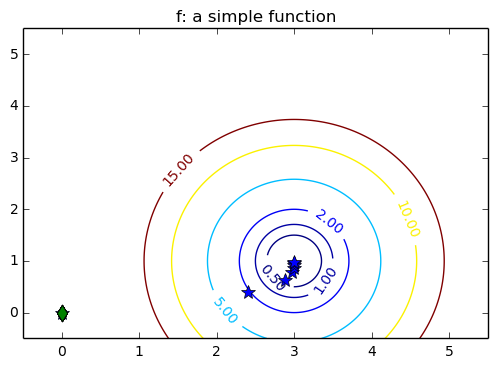

In [7]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb1.f , x_tab , xW_tab ,  pb1.x1_min, pb1.x1_max, pb1.x2_min, pb1.x2_max, pb1.nb_points,  pb1.levels ,  pb1.title )

---
### 1b. Comparing constant stepsize gradient algorithm and Wolfe search on Problem 2

> Try different starting points and observe the results of line search.


In [8]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import problem2 as pb2


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (1.5,1.5 ) )   # Initial point
step    = 0.1

##### gradient algorithm
x,x_tab = gradient_algorithm(pb2.f , pb2.f_grad , x0 , step , PREC , ITE_MAX )

##### Wolfe line-search algorithm
xW,xW_tab = gradient_Wolfe(pb2.f , pb2.f_grad , x0 , PREC , ITE_MAX )


importing notebook from algoGradient.ipynb
importing notebook from problem2.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 13 iterations / 0.000675s -- final value: 0.003082 at point (2.99,1.07)


------------------------------------
 Gradient with Wolfe line search
------------------------------------
START
FINISHED -- 19 iterations / 0.000317s -- final value: 7.901715 at point (1.50,1.50)




###### Plots

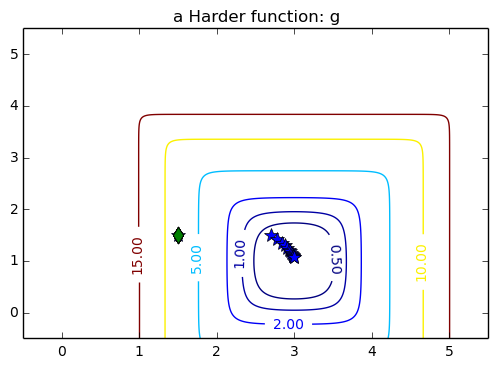

In [9]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb2.f , x_tab , xW_tab ,  pb2.x1_min, pb2.x1_max, pb2.x2_min, pb2.x2_max, pb2.nb_points,  pb2.levels ,  pb2.title )

---
### 1c. Comparing constant stepsize gradient algorithm and Wolfe search on Problem 3

> Compare the convergence of the gradient with and without line search. Keeping in mind that Newton method takes around $30$ iterations to converge, what is the biggest problem for minimizing such function, the stepsize or the descent direction?


In [10]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import problem3 as pb3


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.0001                     # Sought precision
ITE_MAX = 10000                       # Max number of iterations
x0      = np.array( (-1.0,1.2 ) )   # Initial point
step    = 0.001

##### gradient algorithm
x,x_tab = gradient_algorithm(pb3.f , pb3.f_grad , x0 , step , PREC , ITE_MAX )

##### Wolfe line-search algorithm
xW,xW_tab = gradient_Wolfe(pb3.f , pb3.f_grad , x0 , PREC , ITE_MAX )


importing notebook from algoGradient.ipynb
importing notebook from problem3.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.001
FINISHED -- 9516 iterations / 0.286776s -- final value: 0.000091 at point (0.99,0.98)


------------------------------------
 Gradient with Wolfe line search
------------------------------------
START
FINISHED -- 9999 iterations / 0.169996s -- final value: 8.000000 at point (-1.00,1.20)




###### Plots

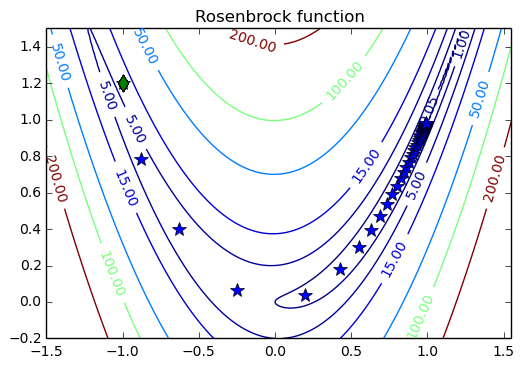

In [11]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb3.f , x_tab , xW_tab ,  pb3.x1_min, pb3.x1_max, pb3.x2_min, pb3.x2_max, pb3.nb_points,  pb3.levels ,  pb3.title )

---
### 1d. Comparing constant stepsize gradient algorithm and Wolfe search on Problem 5

> Try different starting points $(0,0)$ , $(0,1)$, $(1,0)$, $(0.2,0.4)$.


In [12]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import problem5 as pb5


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.001                     # Sought precision
ITE_MAX = 100                       # Max number of iterations
x0      = np.array( (0.,0. ) )   # Initial point
step    = 0.1

##### gradient algorithm
x,x_tab = gradient_algorithm(pb5.f , pb5.f_grad , x0 , step , PREC , ITE_MAX )

##### Wolfe line-search algorithm
xW,xW_tab = gradient_Wolfe(pb5.f , pb5.f_grad , x0 , PREC , ITE_MAX )


importing notebook from algoGradient.ipynb
importing notebook from problem5.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 99 iterations / 0.001895s -- final value: 0.000000 at point (3.00,1.00)


------------------------------------
 Gradient with Wolfe line search
------------------------------------
START
FINISHED -- 99 iterations / 0.001244s -- final value: 5.000000 at point (0.00,0.00)




###### Plots

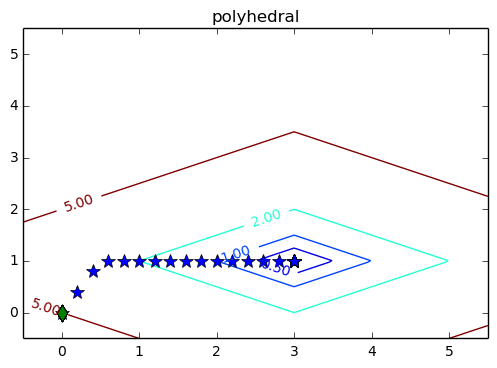

In [13]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb5.f , x_tab , xW_tab ,  pb5.x1_min, pb5.x1_max, pb5.x2_min, pb5.x2_max, pb5.nb_points,  pb5.levels ,  pb5.title )

# 2. Quasi Newton

Now that we have a proper way of choosing a good stepsize, we see that the opposite of the gradient is not always a good descent direction. We saw in the previous Lab that Newton method was sometimes computationally expensive. In this section, we investigate a method to choose descent directions based on the approximation of the inverse Hessian.

For a differentiable function $f$, Quasi-Newton methods iteratively construct an approximation $W_k$ of the inverse of the Hessian then use descent direction $-W_k\nabla f(x_k)$.

**BFGS.** (Broyden-Fletcher-Goldfarb-Shanno, 1970) The popular BFGS algorithm consist in performing the following iteration
$$ x_{k+1}=x_k - \gamma_k W_k \nabla f(x_k)$$
where $\gamma_k$ is given by Wolfe's line-search and positive definite matrix $W_k$ is computed as
$$ W_{k+1}=W_k - \frac{s_k y_k^T W_k+W_k y_k s_k^T}{y_k^T s_k} +\left[1+\frac{y_k^T W_k y_k}{y_k^T s_k}\right]\frac{s_k s_k^T}{y_k^T s_k} $$
with $s_k=x_{k+1}-x_{k}$ and $y_k=\nabla f(x_{k+1}) - \nabla f(x_{k})$.

The general scheme is then:
* from initial point $x_0$, and initial positive definite matrix $W_0$;
* from gradient $\nabla f(x_k)$, compute direction $d_k=-W_k \nabla f(x_k)$;
* compute stepsize $\gamma_k$ by Wolfe's line-search;
* from new point $x_{k+1}$, call the function oracle and compute $W_{k+1}$.

> Implement BFGS method in `algoGradient.ipynb [Section 3]`.

*Hint: Use fonction `np.outer(a,b)` to compute $ab^T$.*


---
### Comparing constant stepsize gradient algorithm and Wolfe search on Problem 3

> Compare the convergence of the gradient with line search and BFGS; then Newton vs BFGS


In [14]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import problem3 as pb3


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-4                    # Sought precision
ITE_MAX = 10000                       # Max number of iterations
x0      = np.array( (-1.0,1.2 ) )   # Initial point

##### Wolfe line-search algorithm
xW,xW_tab = gradient_Wolfe(pb3.f , pb3.f_grad , x0 , PREC , ITE_MAX )

##### Newton algorithm
xN,xN_tab = newton_algorithm(pb3.f , pb3.f_grad_hessian , x0 , PREC , ITE_MAX )

##### BFGS algorithm
xB,xB_tab = bfgs(pb3.f , pb3.f_grad , x0 , PREC , ITE_MAX )

importing notebook from algoGradient.ipynb
------------------------------------
 Gradient with Wolfe line search
------------------------------------
START
FINISHED -- 9999 iterations / 0.214314s -- final value: 8.000000 at point (-1.00,1.20)


------------------------------------
Newton's algorithm
------------------------------------
START
FINISHED -- 5 iterations / 0.000530s -- final value: 0.000000 at point (1.00,1.00)


------------------------------------
 BFGS
------------------------------------
START
FINISHED -- 9999 iterations / 0.171294s (1 sim. calls) -- final value: 8.000000 at point (-1.00,1.20)




###### Plots

* Gradient with line search vs BFGS

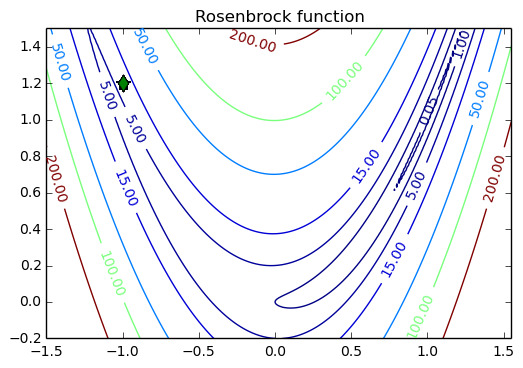

In [15]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb3.f , xW_tab , xB_tab ,  pb3.x1_min, pb3.x1_max, pb3.x2_min, pb3.x2_max, pb3.nb_points,  pb3.levels ,  pb3.title )

* Newton vs BFGS

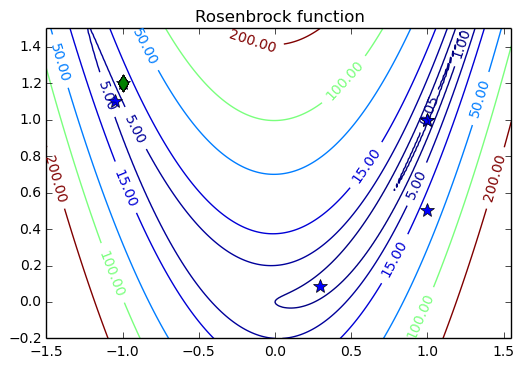

In [16]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb3.f , xN_tab , xB_tab ,  pb3.x1_min, pb3.x1_max, pb3.x2_min, pb3.x2_max, pb3.nb_points,  pb3.levels ,  pb3.title )

# Appendix: <a id="pbs">Problems</a>

The problems we consider in this first lab are minimizations of unconstrained continous functions. 


> **1.** <a id="pb3">`problem1`</a> features a simple quadratic function
$$\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2-1)^2
\end{array}$$
<center><img src="Fig/1.png" width="50%"></center>


> **2.** <a id="pb3">`problem2`</a> features a more involved but very smooth function
$$\begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3)
\end{array}$$
<center><img src="Fig/2.png" width="50%"></center>


> **3.** <a id="pb3">`problem3`</a> features Rosenbrock's smooth but non-convex function
$$\begin{array}{rrcll}
r: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  (1-x_1)^2 + 100(x_2-x_1^2)^2
\end{array}$$
<center><img src="Fig/3.png" width="50%"></center>


> **4.** <a id="pb4">`problem4`</a> features a smooth function with two distinct minimizers
$$\begin{array}{rrcll}
t: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & (0.6 x_1 + 0.2 x_2)^2 \left((0.6 x_1 + 0.2 x_2)^2 - 4 (0.6 x_1 + 0.2 x_2)+4\right) + (-0.2 x_1 + 0.6 x_2)^2
\end{array}$$
<center><img src="Fig/4.png" width="50%"></center>


> **5.** <a id="pb5">`problem5`</a> features a polyhedral function
$$\begin{array}{rrcll}
p: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  \left| x_1-3 \right|  + 2\left| x_2-1\right| .
\end{array}$$
<center><img src="Fig/5.png" width="50%"></center>

